## PHYS 249 Assignment 2:  Comparing Numerical Integration Techniques

(Based on Newman question 5.7/5.8 - see Chapter 5 of the text for details)

**2.1)** (based on Newman 5.7a) Consider the integral

$$I = \int^1_0 sin^2\sqrt{100x}\,dx\,.$$
We are going to try evaluating this integral, but first, plot the integrand over the interval [0,1] to see how it behaves.

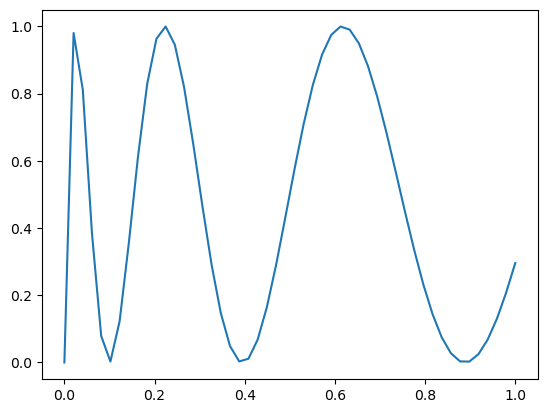

In [45]:
from math import *
import numpy as np
from matplotlib.pyplot import *

x = np.linspace(0,1, 50)
ylist = []

for ele in x:
    ylist.append(sin(sqrt(100*ele))**2)
    
y = np.array(ylist)
plot(x,y)
show()
    

**2.2)** Now write a user-defined function to calculate $I$ using the trapezoid rule, given a number N slices to use. (Your function can also take the upper and lower limits of the integral as arguments, if you like.)

Then, using your function:

– start with $N = 1$ slice, then use $N = 2$, then $N = 4$ etc., doubling the number of slices used until the estimated relative accuracy is approximately $\epsilon = 10^{−6}$ or less, i.e. the answer is correct to six digits after the decimal point.

[Note you can estimate the accuracy in each step by assuming it is roughly the value at that step minus the value at the previous step. This is clearly closer to the accuracy of the **previous** step, but we will ignore this complication here.]

– print out, for each step, the number of slices $N$, the estimate of $I$, and the estimate of the accuracy $\epsilon$. You should find a final value for $I$ close to 0.45.


Also, we will want to plot the errors later on, so save them for later. An easy way to do this is to start an empty list for $N$ and one for the errors, and append to each list every time you change $N$. 

In [55]:
def calci (n: int): 
    x = np.linspace(0,1, n)
    ans = 0
    xlist = []
    for ele in x:
        xlist.append(ele)
    dx = (1/n)/2
    for i in range(0, len(xlist)):
        if i == 0 or i == len(xlist)-1 :
            ans += (sin(sqrt(100*xlist[i]))**2)
        else:
            ans += 2*(sin(sqrt(100*xlist[i]))**2)
    return dx*ans

Nlist = []
errList = []
n = 1
err = 1
while err >= 10e-6:
    curr = calci(n)
    nex = calci(n*2)
    err = nex - curr
    Nlist.append(n)
    errList.append(err)
    print(n, calci(n), err)
    n = n*2

1 0.0 0.073989742273326
2 0.073989742273326 0.24910843660626036
4 0.32309817887958636 0.03281581861078181
8 0.3559139974903682 0.044716296827410296
16 0.40063029431777847 0.03332354360667794
32 0.4339538379244564 0.012806953643767771
64 0.4467607915682242 0.005022731886791643
128 0.4517835234550158 0.0021466722977613317
256 0.45393019575277715 0.000981646646005141
512 0.4549118423987823 0.0004679493633032994
1024 0.4553797917620856 0.00022826903462913606
2048 0.45560806079671473 0.00011271012646540957
4096 0.45572077092318014 5.5999243819104816e-05
8192 0.45577677016699925 2.791070344038138e-05
16384 0.4558046808704396 1.3933126752185832e-05
32768 0.4558186139971918 6.961007716854706e-06


**2.3)** (based on Newman 7.8) Repeat **2.2** using Simpson’s rule (starting with two slices, since this is the minimum required in this case.)

In [56]:
def calcIsimp (n: int): 
    x = np.linspace(0,1, n)
    ans = 0
    xlist = []
    for ele in x:
        xlist.append(ele)
    dx = (1/n)/3
    for i in range(0, len(xlist)):
        if i == 0 or i == len(xlist):
            ans += (sin(sqrt(100*xlist[i]))**2)
        elif i % 2 == 0:
            ans += 2*(sin(sqrt(100*xlist[i]))**2)
        else:
            ans += 4*(sin(sqrt(100*xlist[i]))**2)
    return dx*ans

NlistS = []
errListS = []
n = 2
err = 1
while err >= 10e-6:
    curr = calcIsimp(n)
    nex = calcIsimp(n*2)
    err = nex - curr
    NlistS.append(n)
    errListS.append(err)
    print(n, calcIsimp(n), err)
    n = n*2

2 0.19730597939553599 0.13175698730575905
4 0.32906296670129503 0.03737396707813434
8 0.3664369337794294 0.05714583878857965
16 0.423582772568009 0.02350651603613746
32 0.4470892886041465 0.004801881002551356
64 0.45189116960669784 0.0019628158980913857
128 0.4538539855047892 0.0009799840273272964
256 0.4548339695321165 0.0004965143375726955
512 0.4553304838696892 0.00025030600791520197
1024 0.4555807898776044 0.00012569015349683799
2048 0.45570648003110126 6.298079607724993e-05
4096 0.4557694608271785 3.152440247938815e-05
8192 0.4558009852296579 1.5770705182382994e-05
16384 0.4558167559348403 7.887478530199665e-06


**2.4)** Plot $\log(|\epsilon|)$ versus $\log(N)$ for the two methods, together on a single plot. 

What do you conclude - which is the fastest way of reaching the required accuracy?

Also comment on the rate at which the error varies with $N$ in the two cases. Is it what you expect?

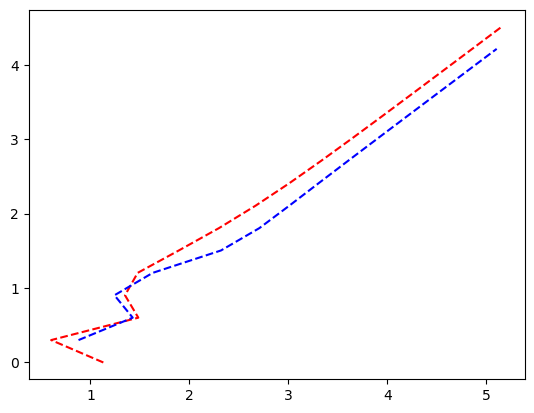

In [58]:
from math import log10

errListplot = []
Nlistplot = []
errListSplot = []
NlistSplot = []

for eleE in errList:
    errListplot.append(abs(log10(eleE)))
for eleN in Nlist:
    Nlistplot.append(log10(eleN))
for eleEs in errListS:
    errListSplot.append(abs(log10(eleEs)))
for eleNs in NlistS:
    NlistSplot.append(log10(eleNs))

plot(errListplot, Nlistplot, 'r--')
plot(errListSplot, NlistSplot, 'b--')
show()

#looking at the graph they appear to be the same, however, looking at the data, the simpson's rule method causes less
#error with less splices. Therefore, simpson's rule is the fastest.